In [43]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import math

In [47]:
# constants

#S=600.4     #Incident_Flux (W/m^2)
l=float(input("length of collector(m) : "))
br=float(input("breadth of collector(m) : "))
#W = 0.12    #Centre dist (m)
W=float(input("Tube centre-to-centre distance(m) : "))

#D = 0.018   #Output dia. (m)
D=float(input("Outer Diameter of tube(m): "))
Di=float(input("Inner Diameter of tube(m): "))


#k = 35      # thermal conductivity ( W/mC)
k=float(input("Thermal conductivity of plate (W/mC) : "))

#t_p =1.3e-3 # plate thickness (mm)
l_p=float(input("length of Plate(m) : "))
b_p=float(input("width of plate (m) : "))
A=l_p*b_p

l_pc1=float(input("plate to cover spacing (m) : "))
l_c1c2=float(input("between cover spacing (m) : "))
t_p=float(input("plate thickness (m) : "))


U = 4.0     # Overall resistance ( W /m^2C)

Ep=float(input("Plate emissivity: "))
Ec=float(input("glass cover emissivity: "))

alpha=float(input("enter plate absorptivity : "))


#m =  70     # mass flow rate (kg/s)
m=float(input("water flow rate (kg/h) : "))
Cp=4180
hf=float(input("fluid to tube heat transfer coefficient (W/m^2-C): "))
back_th=float(input(" Back insulation thickness (m ) : "))
ki=float(input("Insulation themal conductivity (W/m-C ) : "))

wind_speed=float(input("wind speed: "))
T_fi = 40   # fluid inlet temp (celsius)
Ta =float(input(" Ambient temp ( celsius) : "))
T_a=Ta+273.16

length of collector(m) : 1.6
breadth of collector(m) : 1.1
Tube centre-to-centre distance(m) : 0.12
Outer Diameter of tube(m): 0.018
Inner Diameter of tube(m): 0.014
Thermal conductivity of plate (W/mC) : 35
length of Plate(m) : 1.5
width of plate (m) : 1
plate to cover spacing (m) : 0.025
between cover spacing (m) : 0.025
plate thickness (m) : 0.0013
Plate emissivity: 0.95
glass cover emissivity: 0.88
enter plate absorptivity : 0.95
water flow rate (kg/h) : 70
fluid to tube heat transfer coefficient (W/m^2-C): 205
 Back insulation thickness (m ) : 0.05
Insulation themal conductivity (W/m-C ) : 0.04
 Ambient temp ( celsius) : 25


In [48]:
Month={"january":0,"february":31,"march":59,"april":90,"may":120,"june":51,"july":181,"august":212,"september":243,"october":273,"november":304,"december":334}

month=input("Enter month : ").lower()
day=int(input("Enter day : "))
n=Month[month]+day
print(n)
thita=360*(284+n)/365
delta=math.radians(23.45*math.sin(math.radians(thita)))
print(delta)

Enter month : may
Enter day : 15
135
0.3279808334469979


In [49]:

L_degree=int(input(" Enter latitude degree : "))
L_min=int(input("Enter latitude minutes : "))
latitude=L_degree+(L_min/60)
latitude_angle=math.radians(L_degree+(L_min/60))




 Enter latitude degree : 18
Enter latitude minutes : 32


In [50]:
Lo_degree=int(input(" Enter longitude degree : "))
Lo_min=int(input("Enter longitude minutes : "))
time=float(input("enter time(IST): "))
LAT=60-round(4*(82.5-(Lo_degree+(Lo_min/60))))
hour_angle= math.radians(((12-(time-1))*60-LAT)*15/60)


 Enter longitude degree : 73
Enter longitude minutes : 51
enter time(IST): 11


In [51]:
c_thita=math.sin(delta)*0+math.cos(delta)*math.cos(0)*math.cos(hour_angle)
rb=c_thita/(math.sin(delta)*math.sin(latitude_angle)+math.cos(delta)*math.cos(latitude_angle)*math.cos(hour_angle))
rd=(1+math.cos(latitude_angle))/2
rr=0.2*(1-math.cos(latitude_angle))/2

Ib=float(input("enter beam radiation : "))
Id=float(input("enter diffused radiation: "))
I_t=Ib*rb+Id*rd+(Id+Ib)*rr
  

    
    
    
    
    
    



         
         
         

enter beam radiation : 665
enter diffused radiation: 230


In [52]:
incident=math.acos(c_thita)
print(incident*180/3.14)
refraction1=math.asin(math.sin(incident)/1.56)

29.958400843279673


In [53]:

rp=(math.sin(incident-refraction1))**2/(math.sin(incident+refraction1))**2
rh=(math.tan(incident-refraction1))**2/(math.tan(incident+refraction1))**2
Trp=(1-rp)/(1+(3*rp))
Trh=(1-rh)/(1+(3*rh))
Tr=0.5*(Trp+Trh)
Ta=math.exp(-0.0524*2/math.cos(refraction1))
T=Tr*Ta
T_alpha_b=T*alpha/(1-(1-alpha)*0.22)

rp1=(math.sin(1.0466-0.60323))**2/(math.sin(1.0466+0.60323))**2
rh1=(math.tan(1.0466-0.60323))**2/(math.tan(1.0466+0.60323))**2
Trp1=(1-rp1)/(1+(3*rp1))
Trh1=(1-rh1)/(1+(3*rh1))
Tr1=0.5*(Trp1+Trh1)
Ta1=math.exp(-0.0524*2/math.cos(0.60323))
T1=Tr1*Ta1
T_alpha_d=T1*alpha/(1-(1-alpha)*0.22)

print(T_alpha_b,T_alpha_d)


0.7141355602185387 0.6420242630947328


In [54]:
S=(Ib*rb*T_alpha_b)+(Id*rd*T_alpha_d)
S

589.2072070528211

In [69]:
#Calculation part

def plate_temp(U,T_fi):
    
    m_ = (U/(k*t_p))**(0.5)                                            # m^-1

    effectiveness = (np.tanh(m_*(W-D)/2))/(m_*(W-D)/2)


#Finding collector efficiency factor (F')  

    F_ = (W*U*((1/(U*((W-D)*effectiveness+D)))+(1/(Di*3.14*hf))))**(-1)
    part=m*Cp/A
    F_R = (part/U)*(1-np.exp(-(U*F_ /part)))                       # Heat removal factor


    heat_gain = F_R * A *( S - U*(T_fi - Ta))


    heat_loss = S*A - heat_gain 


    T_pm = (heat_loss/(U*A)) + Ta


    T_pm += 273.16
    return T_pm,heat_gain

In [62]:
df=pd.read_excel('AIR_PROPERTIES.xlsx')
df.head()

,Temperature,viscosity,Pr,t_conductivity
0,10,0.000014,0.7050,0.025120
1,11,0.000014,0.7048,0.025201
2,12,0.000014,0.7046,0.025282
3,13,0.000014,0.7044,0.025363
4,14,0.000015,0.7042,0.025444


In [63]:
df.columns

Index(['Temperature ', 'viscosity', 'Pr', 't_conductivity'], dtype='object')

In [70]:
def convective(T_pm,T_c1,df,spacing):
    T_mean = (T_pm + T_c1)/2
    T_mean=round(T_mean-273.16)
    
    vis=df.loc[(df['Temperature ']==T_mean),'viscosity']
    viscosity=vis.item()
    
    Pr=df[df['Temperature ']==T_mean]['Pr'].item()
    t_conductivity=df[df['Temperature ']==T_mean]['t_conductivity'].item()

    rayliegh = 9.81 * (T_mean**(-1)) *((T_pm- T_c1)* (spacing**(3))* Pr* math.cos(latitude_angle) / (viscosity**2))
    nusselt = 0.229 * rayliegh**(0.252)

    h_pc1 = nusselt* t_conductivity / spacing
    return h_pc1




In [71]:
def prop(T_c2,T_a,df):
    Tmean=round(((T_c2+T_a)/2)-273.16)
    
    
    vis=df.loc[(df['Temperature ']==Tmean),'viscosity']
    viscosity=vis.item()
    
    Pr=df[df['Temperature ']==Tmean]['Pr'].item()
    t_conductivity=df[df['Temperature ']==Tmean]['t_conductivity'].item()
    
    return viscosity,Pr

In [72]:
lt=[]

while(T_fi<=100):
    # Calculating heat loss coeficient 
  
    while(True):

        T_sky = T_a - 6;
    
        T_pm,q_u=plate_temp(U,T_fi)
        print(T_pm)

        beta = 1/T_pm 
    
        T_c1 =  T_pm-15
        T_c2 = T_c1-15 
        
        while(True):
        
            h_pc1=convective(T_pm,T_c1,df,l_pc1)
    
            h_c1c2=convective(T_c1,T_c2,df,l_c1c2)
    
            hr_pc1=5.67e-8*(T_pm+T_c1)*((T_pm**2)+(T_c1**2))/((1/Ep)+(1/Ec)-1)
            hr_c1c2=5.67e-8*(T_c2+T_c1)*((T_c2**2)+(T_c1**2))/((1/Ec)+(1/Ec)-1)
            hr_c2a=5.67e-8*Ec*(T_c2**2-T_sky**2)*(T_c2**2+T_sky**2)/(T_c2-T_a)
            viscosity,Pr=prop(T_c2,T_a,df)
            Lc=4*l*br/(2*(l+br))
            Rel=wind_speed*Lc/viscosity
            j=0.86/(Rel**(0.5))
            hw=j*1.15*1005*wind_speed/(Pr**(2/3))
            R1=1/(h_pc1+hr_pc1)
            R2=1/(h_c1c2+hr_c1c2)
            R3=1/(hw+hr_c2a)
            Ut=1/(R1+R2+R3)
            
            a=(T_pm-T_c1)/R1
            b=(T_c1-T_c2)/R2
            c=(T_c2-T_sky)/R3
            diff=[abs(a-b),abs(b-c),abs(c-a)]
            if(any(ele < 1 for ele in diff)):
                break

        
            T_c1= T_pm-(Ut*(T_pm-T_a)*R1)
         
            T_c2= T_c1-(Ut*(T_pm-T_a)*R2)
                    
        
        Ub=ki/back_th
        Us=0.1*Ub
        U_=Ut+Ub+Us
    
        if(abs(U_-U)< 2):
            break
            
        U=U_
    
    T_fo=T_fi+(q_u*3600/(m*4180))
    
    efficiency=100*q_u/(I_t*l_p)   
    
    di={'Tfi(C)':T_fi,'Tpm(K)':T_pm,'Ut(W/m^2-K)':Ut,'qu(W)':q_u,'Tfo(C)':T_fo,'efficiency(%)':efficiency}
    lt.append(di)
    
    T_fi=T_fi+10
        
        
        
    

wind speed: 3.1
324.43957227612117
333.39706985906037
342.35456744199956
351.31206502493876
360.269562607878
369.2270601908172
378.1845577737564


In [73]:
data=pd.DataFrame(lt)
data

,Tfi(C),Tpm(K),Ut(W/m^2-K),qu(W),Tfo(C),efficiency(%)
0,40,324.439572,3.718248,581.505077,47.154540,45.483691
1,50,333.397070,4.052666,527.760092,56.493289,41.279910
2,60,342.354567,4.130023,474.015106,65.832038,37.076128
3,70,351.312065,4.217909,420.270121,75.170788,32.872347
4,80,360.269563,4.321966,366.525135,84.509537,28.668565
5,90,369.227060,4.422759,312.780150,93.848286,24.464784
6,100,378.184558,4.533096,259.035164,103.187036,20.261002


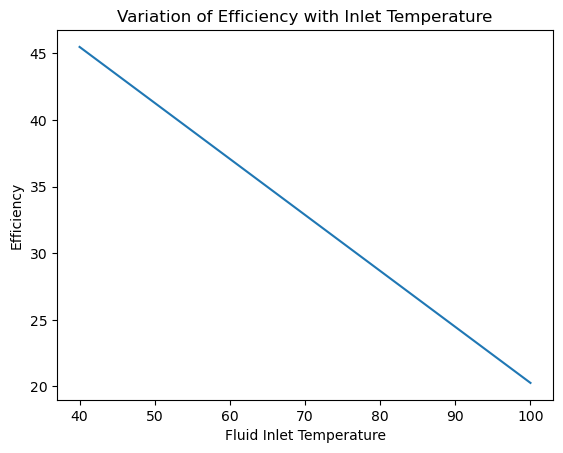

In [74]:

x=data['Tfi(C)']
y=data['efficiency(%)']
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Fluid Inlet Temperature')
# naming the y axis
plt.ylabel('Efficiency')
  
# giving a title to my graph
plt.title('Variation of Efficiency with Inlet Temperature')
  
# function to show the plot
plt.show()